In [ ]:
import pandas as pd

data = pd.read_csv('D:/ecommerce_python_analyse/2019-Oct.csv')

data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


Data preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [ ]:
data.describe()

,product_id,category_id,price,user_id
count,4.244876e+07,4.244876e+07,4.244876e+07,4.244876e+07
mean,1.054993e+07,2.057404e+18,2.903237e+02,5.335371e+08
std,1.188191e+07,1.843926e+16,3.582692e+02,1.852374e+07
min,1.000978e+06,2.053014e+18,0.000000e+00,3.386938e+07
25%,1.005157e+06,2.053014e+18,6.598000e+01,5.159043e+08
50%,5.000470e+06,2.053014e+18,1.629300e+02,5.296965e+08
75%,1.600030e+07,2.053014e+18,3.585700e+02,5.515788e+08
max,6.050001e+07,2.175420e+18,2.574070e+03,5.662809e+08


In [ ]:
data.duplicated().sum()

np.int64(30220)

In [ ]:
data.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64

In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

Exploratory and Visualisation of Data

In [3]:
Data = data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [ ]:
Data['event_type'].value_counts()

event_type
view        25200302
cart          784361
purchase      549446
Name: count, dtype: int64

In [ ]:
Data['brand'].value_counts()

brand
samsung         5147344
apple           4087084
xiaomi          2695456
huawei          1090907
lg               508504
                 ...   
schardt               1
cooperhunter          1
tigres                1
airmax                1
kalibr                1
Name: count, Length: 1731, dtype: int64

In [ ]:
Data['product_id'].value_counts()

product_id
1004856     497704
1004767     436799
1005115     355303
1004833     236490
1004249     230648
             ...  
6600911          1
7006039          1
39700151         1
39700175         1
39700176         1
Name: count, Length: 60371, dtype: int64

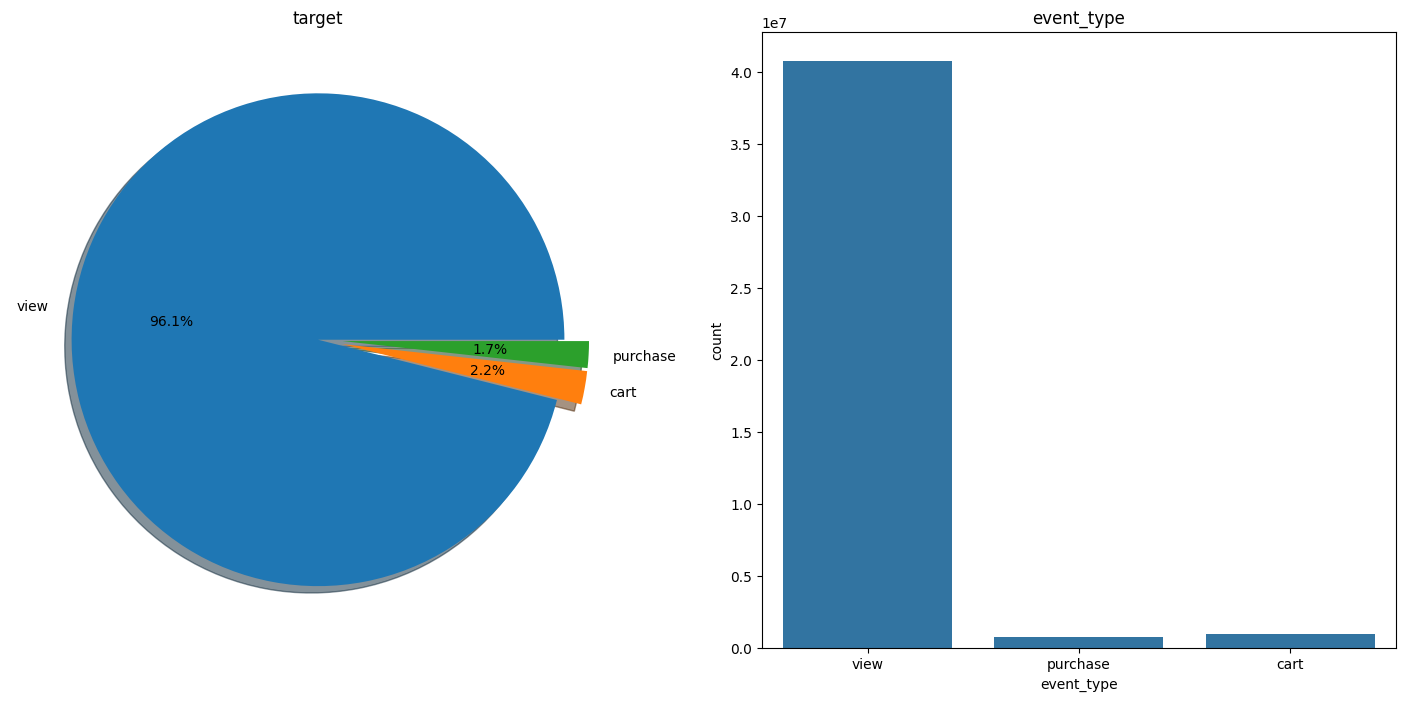

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the number of categories in 'event_type'
num_categories = len(Data['event_type'].value_counts())

# Create an explode list with the same length as the number of categories
explode = [0] + [0.1] * (num_categories - 1)  # Explode the second slice and onwards


f, ax = plt.subplots(1, 2, figsize=(18, 8))
Data['event_type'].value_counts().plot.pie(
    explode=explode, autopct="%1.1f%%", ax=ax[0], shadow=True
)  # Use the generated explode list
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x='event_type', data=Data, ax=ax[1])
ax[1].set_title('event_type')
plt.show()

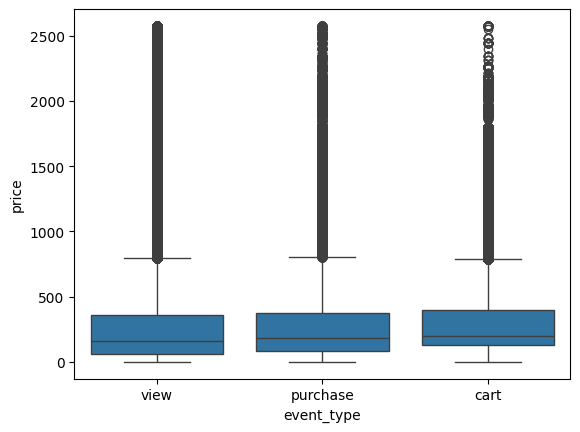

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of 'price' for different 'event_type' categories
sns.boxplot(x='event_type', y='price', data=Data)
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

Data = data.drop(columns=['event_time'], axis=1)  

# Select only numerical features for scaling
numerical_features = Data.select_dtypes(include=['number']).columns
numerical_data = Data[numerical_features]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features, index=Data.index)

final_df = pd.concat([Data.drop(columns=numerical_features, axis=1), scaled_df], axis=1)

In [ ]:
final_df.to_csv('final_df.csv', index=False)